In [3]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import pickle
from surprise import BaselineOnly
import eda_fe_module as eda_fe
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
#from surprise import prediction_algorithms.matrix

In [32]:
## Loading dataframe
user_item_df = pickle.load(open('user_item_df.pkl','rb'))
user_item_matrix = pickle.load(open('sparse_ui_df.pkl','rb'))

## Exploratory Data Analysis

In [3]:
x_ticks = [i*int(user_item_df['user_id'].nunique()/100) for i in range(0,101,10)]
quantiles = np.percentile(user_item_df['user_id'].value_counts().values,q=[i for i in range(0,101,10)])

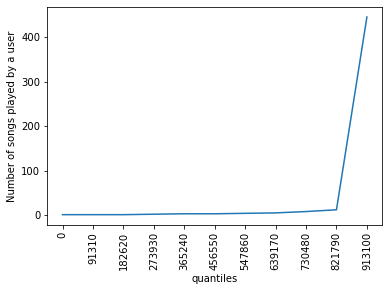

In [4]:
x_range = [i for i in range(0,101,10)]
plt.xticks(x_ticks,x_ticks,rotation=90)
plt.ylabel("Number of songs played by a user")
plt.xlabel("quantiles")
plt.plot(x_ticks,quantiles)

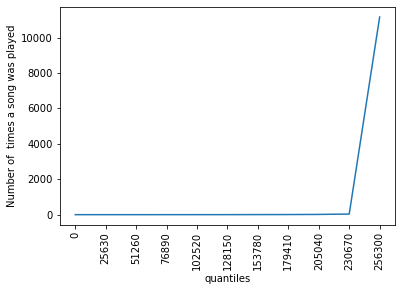

In [5]:
x_ticks = [i*int(user_item_df['song_id'].nunique()/100) for i in range(0,101,10)]
quantiles = np.percentile(user_item_df['song_id'].value_counts().values,q=[i for i in range(0,101,10)])
plt.xticks(x_ticks,x_ticks,rotation=90)
plt.ylabel("Number of  times a song was played")
plt.xlabel("quantiles")
plt.plot(x_ticks,quantiles)

## Distribution of play counts

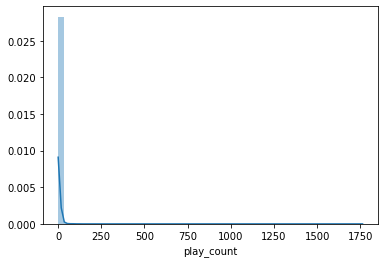

In [27]:
sns.distplot(user_item_df['play_count'])

In [28]:
unique_tracks = pd.read_csv('unique_tracks.csv')
unique_artists = pd.read_csv('unique_artists.csv')
tracks_per_year = pd.read_csv('tracks_per_year.csv')
artist_location = pd.read_csv('artist_location.csv')

In [29]:
unique_tracks.head(10)

,TRMMMYQ128F932D901<SEP>SOQMMHC12AB0180CB8<SEP>Faster Pussy cat<SEP>Silent Night
0,TRMMMKD128F425225D<SEP>SOVFVAK12A8C1350D9<SEP>...
1,TRMMMRX128F93187D9<SEP>SOGTUKN12AB017F4F1<SEP>...
2,TRMMMCH128F425532C<SEP>SOBNYVR12A8C13558C<SEP>...
3,TRMMMWA128F426B589<SEP>SOHSBXH12A8C13B0DF<SEP>...
4,TRMMMXN128F42936A5<SEP>SOZVAPQ12A8C13B63C<SEP>...
5,TRMMMLR128F1494097<SEP>SOQVRHI12A6D4FB2D7<SEP>...
6,TRMMMBB12903CB7D21<SEP>SOEYRFT12AB018936C<SEP>...
7,TRMMMHY12903CB53F1<SEP>SOPMIYT12A6D4F851E<SEP>...
8,TRMMMML128F4280EE9<SEP>SOJCFMH12A8C13B0C2<SEP>...
9,TRMMMNS128F93548E1<SEP>SOYGNWH12AB018191E<SEP>...


In [30]:
unique_tracks_first_row = unique_tracks.columns

In [38]:
unique_tracks.columns = ['data']
unique_tracks_df = unique_tracks.apply(lambda x : x['data'].split('<SEP>'),axis=1)
unique_tracks_df = pd.DataFrame(unique_tracks_df.values.tolist(),columns = ['track_id','song_id','artist_name','song_title'])

In [39]:
unique_tracks_df.head()

,track_id,song_id,artist_name,song_title
0,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
1,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
2,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
3,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens
4,TRMMMXN128F42936A5,SOZVAPQ12A8C13B63C,David Montgomery,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All..."


In [51]:
column_names = unique_tracks_df.columns
unique_tracks_df.append(dict(zip(column_names,str(unique_tracks_first_row[0]).split('<SEP>'))),ignore_index=True)

,track_id,song_id,artist_name,song_title
0,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
1,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
2,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
3,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens
4,TRMMMXN128F42936A5,SOZVAPQ12A8C13B63C,David Montgomery,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All..."
...,...,...,...,...
999995,TRYYYJO128F426DA37,SOXQYIQ12A8C137FBB,Kuldeep Manak,Jago Chhadeo
999996,TRYYYMG128F4260ECA,SOHODZI12A8C137BB3,Gabriel Le Mar,Novemba
999997,TRYYYDJ128F9310A21,SOLXGOR12A81C21EB7,Elude,Faraday
999998,TRYYYVU12903CD01E3,SOWXJXQ12AB0189F43,Texta,Fernweh feat. Sektion Kuchikäschtli


In [52]:
pickle.dump(unique_tracks_df,open('unique_tracks_df.pkl','wb'))

In [53]:
unique_tracks_df.shape

(999999, 4)

In [54]:
def formatDataFrame(df,seperator,df_columns):
    df_first_row = df.columns
    df.columns = ['temp']
    temp_df = df.apply(lambda x : x['temp'].split(seperator),axis=1)
    temp_df = pd.DataFrame(temp_df.values.tolist(),columns = df_columns)
    column_names = temp_df.columns
    temp_df.append(dict(zip(column_names,str(df_first_row[0]).split(seperator))),ignore_index=True)
    return temp_df

In [55]:
unique_artist_df = formatDataFrame(unique_artists,'<SEP>',['artist_id','artist_mbid','track_id','artist_name'])
unique_artist_df.head()

,artist_id,artist_mbid,track_id,artist_name
0,AR003FB1187B994355,1dbd2d7b-64c8-46aa-9f47-ff589096d672,TRWDPFR128F93594A6,The Feds
1,AR006821187FB5192B,94fc1228-7032-4fe6-a485-e122e5fbee65,TRMZLJF128F4269EAC,Stephen Varcoe/Choir of King's College_ Cambri...
2,AR009211187B989185,9dfe78a6-6d91-454e-9b95-9d7722cbc476,TRMGURO12903CAE2F0,Carroll Thompson
3,AR009SZ1187B9A73F4,8cd574c0-b9f7-4998-94f4-654dffaecdf2,TRGWWFP12903CE7E79,Gorodisch
4,AR00A1N1187FB484EB,7373764f-c642-4393-9492-97b5622c4bce,TRMMUWQ128F92E88FC,1.000 Mexicans


In [57]:
tracks_per_year_df = formatDataFrame(tracks_per_year,'<SEP>',['year','track_id','artist_id','song_name'])
tracks_per_year_df.head()

,year,track_id,artist_id,song_name
0,1922,TRMYDFV128F42511FC,Barrington Levy,Warm And Sunny Day
1,1922,TRRAHXQ128F42511FF,Barrington Levy,Looking My Love
2,1922,TRFAFTK12903CC77B8,Barrington Levy,Warm And Sunny Day
3,1922,TRSTBUY128F4251203,Barrington Levy,Mandela You're Free
4,1922,TRODGCA128F4251206,Barrington Levy,Something In My Heart (Full Vocal)


In [60]:
artist_location = pd.read_csv('artist_location.csv')

In [65]:
artist_location = artist_location.drop(['Unnamed: ' + str(i) for i in range(1,6)],axis=1)

In [66]:
artist_location_df = formatDataFrame(artist_location,'<SEP>',['artist_id','lat','long','artist_name','location'])
artist_location_df.head()

,artist_id,lat,long,artist_name,location
0,AR8K6F31187B99C2BC,46.44231,-93.36586,Go Fish,Twin Cities
1,ARHJJ771187FB5B581,51.59678,-0.33556,Screaming Lord Sutch,Harrow
2,ARJ8YLL1187FB3CA93,40.69626,-73.83301,Morton Gould,Richmond Hill
3,ARYBAGV11ECC836DAC,43.58828,-79.64372,Crash Parallel,Mississauga
4,AR9SWJO1187FB47837,59.91228,10.74998,Prins Thomas,Oslo


In [67]:
pickle.dump(artist_location_df,open('artist_location_df.pkl','wb'))
pickle.dump(tracks_per_year_df,open('tracks_per_year_df.pkl','wb'))
pickle.dump(unique_artist_df,open('unique_artist_df.pkl','wb'))
pickle.dump(unique_tracks_df,open('unique_tracks_df.pkl','wb'))

In [70]:
print("Number of artist in unique_artist_df : ",unique_artist_df['artist_name'].nunique())
print("Number of artist in artist_location_df : ",artist_location_df['artist_name'].nunique())
print("Number of intersection between two : ",len(set(unique_artist_df['artist_name'].unique()).intersection(set(artist_location_df['artist_name'].unique()))))

Number of artist in unique_artist_df :  43848
Number of artist in artist_location_df :  13628
Number of intersection between two :  13359


In [21]:
artist_location_df = pickle.load(open('artist_location_df.pkl','rb'))
tracks_per_year_df = pickle.load(open('tracks_per_year_df.pkl','rb'))
unique_artist_df = pickle.load(open('unique_artist_df.pkl','rb'))
unique_tracks_df = pickle.load(open('unique_tracks_df.pkl','rb'))

In [7]:
artist_location_df.head()

,artist_id,lat,long,artist_name,location
0,AR8K6F31187B99C2BC,46.44231,-93.36586,Go Fish,Twin Cities
1,ARHJJ771187FB5B581,51.59678,-0.33556,Screaming Lord Sutch,Harrow
2,ARJ8YLL1187FB3CA93,40.69626,-73.83301,Morton Gould,Richmond Hill
3,ARYBAGV11ECC836DAC,43.58828,-79.64372,Crash Parallel,Mississauga
4,AR9SWJO1187FB47837,59.91228,10.74998,Prins Thomas,Oslo


In [9]:
tracks_per_year_df.head()

,year,track_id,artist_id,song_name
0,1922,TRMYDFV128F42511FC,Barrington Levy,Warm And Sunny Day
1,1922,TRRAHXQ128F42511FF,Barrington Levy,Looking My Love
2,1922,TRFAFTK12903CC77B8,Barrington Levy,Warm And Sunny Day
3,1922,TRSTBUY128F4251203,Barrington Levy,Mandela You're Free
4,1922,TRODGCA128F4251206,Barrington Levy,Something In My Heart (Full Vocal)


In [13]:
print("Number of unique artist in artist_location_df : ",artist_location_df['artist_name'].nunique())
print("Number of unique artist in tracks_per_year_df : ",tracks_per_year_df['artist_id'].nunique())

print("Intersection of both sets : ",len(set(tracks_per_year_df['artist_id'].unique()).intersection(set(artist_location_df['artist_name'].unique()))))

Number of unique artist in artist_location_df :  13628
Number of unique artist in tracks_per_year_df :  37771
Intersection of both sets :  9156


In [1]:
import surprise

In [5]:
user_item_matrix

<3x4837358 sparse matrix of type '<class 'numpy.int64'>'
	with 14512057 stored elements in Compressed Sparse Row format>

In [3]:
user_item_df.head()

,user_id,song_id,play_count
0,1bf27ad7ae7992f7ffd7d48a7b76216e19d3db38,SOQXDSY12A58A7DC85,1
1,39bc87a837b8d2590819bb20a59bd30905892fe9,SOGZTIU12A8C14159F,1
2,ce1e525daf590a2a6c1df8902abaa43045afc58d,SOGLBDH12AB018847B,1
3,7133a618ef12d20c8761900f172c7237756d909e,SOXUJMC12A8C133232,3
4,e00940e1d17bcb23125933342c4db084b2394afd,SOFKPIS12AB01841CE,7


In [11]:
user_item_df.play_count = user_item_df.play_count.astype('int')

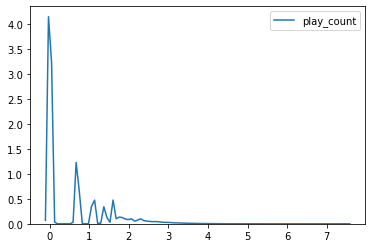

In [12]:
sns.kdeplot(np.log(user_item_df.play_count))

In [14]:
np.median(user_item_df.play_count)

1.0

In [3]:
ui_df = pd.DataFrame(user_item_matrix.todense()).T

In [4]:
import gc
del(user_item_df)
gc.collect()

0

In [5]:
ui_df.rename(columns = {0 : 'user',
                  1 : 'item',
                  2 : 'play_count'},
                inplace=True)
ui_df.head()

,user,item,play_count
0,0,0,1
1,1,1,1
2,2,2,1
3,3,3,3
4,4,4,7


In [36]:
#Let's do some feature engineering
user_feat_df = ui_df.groupby(['user']).agg({'play_count' : ['mean','max','min','sum']}).reset_index().rename(columns = {'index':'user'})
user_feat_df.columns = ['_'.join(col).strip('_') for col in user_feat_df.columns]

song_feat_df = ui_df.groupby(['item']).agg({'play_count' : ['mean','max','min','sum']}).reset_index().rename(columns = {'index' : 'songs'})
song_feat_df.columns = ['_'.join(col).strip('_') for col in song_feat_df.columns]

In [6]:
ui_df.shape

(4837358, 3)

* 4.8 Million user item play counts

In [25]:
user_item_df.head()

,user_id,song_id,play_count
0,1bf27ad7ae7992f7ffd7d48a7b76216e19d3db38,SOQXDSY12A58A7DC85,1
1,39bc87a837b8d2590819bb20a59bd30905892fe9,SOGZTIU12A8C14159F,1
2,ce1e525daf590a2a6c1df8902abaa43045afc58d,SOGLBDH12AB018847B,1
3,7133a618ef12d20c8761900f172c7237756d909e,SOXUJMC12A8C133232,3
4,e00940e1d17bcb23125933342c4db084b2394afd,SOFKPIS12AB01841CE,7


In [27]:
unique_tracks_df.head()

,track_id,song_id,artist_name,song_title
0,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
1,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
2,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
3,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens
4,TRMMMXN128F42936A5,SOZVAPQ12A8C13B63C,David Montgomery,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All..."


In [29]:
tracks_per_year_df.head()

,year,track_id,artist_id,song_name
0,1922,TRMYDFV128F42511FC,Barrington Levy,Warm And Sunny Day
1,1922,TRRAHXQ128F42511FF,Barrington Levy,Looking My Love
2,1922,TRFAFTK12903CC77B8,Barrington Levy,Warm And Sunny Day
3,1922,TRSTBUY128F4251203,Barrington Levy,Mandela You're Free
4,1922,TRODGCA128F4251206,Barrington Levy,Something In My Heart (Full Vocal)


## Objective : To sample the dataframe based on latest years

In [23]:
print("Number of years of tracks :  ",tracks_per_year_df['year'].nunique())

Number of years of tracks :   89


In [24]:
## Since they are in string
## We'll convert them into integers
tracks_per_year_df['year'] = tracks_per_year_df['year'].astype(int)

In [25]:
## Identifying tracks from >= 2005 
tracks_from_2005 = tracks_per_year_df[tracks_per_year_df['year'] >= 2005].copy()

In [26]:
unique_tracks_df.rename(columns = {'song_title' : 'song_name'},inplace=True)
tracks_from_2005.rename(columns ={'artist_id' : 'artist_name'},inplace=True)

In [27]:
merge_sid_df = pd.merge(tracks_from_2005,unique_tracks_df,on=['song_name','track_id','artist_name'],how='left')
merge_sid_df.isnull().sum()

year           0
track_id       0
artist_name    0
song_name      0
song_id        0
dtype: int64

In [28]:
merge_sid_df.head()

,year,track_id,artist_name,song_name,song_id
0,2005,TRPMYJW128F9323194,#Poundsign#,Camera,SOCKIWT12AB017F1A6
1,2005,TRVVJIU128F92D0EB2,$tinkworx,Calimaro,SOMNFZN12A8C14093C
2,2005,TRGHPPQ128F14AB108,'t Hof Van Commerce,Driekartkilo Tekstn,SOFYPBX12A6D4FB72D
3,2005,TRGHJXZ128F14AB109,'t Hof Van Commerce,Van De Fakteur,SONBJLM12A6D4FB72E
4,2005,TRGAGFP128F14AB100,'t Hof Van Commerce,Achter 8 Jaer,SOVCKIJ12A6D4FB728


In [29]:
merge_sid_df.shape

(187139, 5)

In [30]:
## See if we have as many unique songs as song_ids
print("Number of song names : ",merge_sid_df.song_name.nunique())
print("Number of song ids : ",merge_sid_df.song_id.nunique())

Number of song names :  147975
Number of song ids :  186746


In [33]:
merge_ui_df = pd.merge(merge_sid_df,user_item_df,on='song_id',how='left')
merge_ui_df.shape

(1967103, 7)

In [34]:
merge_ui_df.isnull().sum()

year                0
track_id            0
artist_name         0
song_name           0
song_id             0
user_id        109696
play_count     109696
dtype: int64

In [35]:
merge_ui_df.dropna(inplace=True)
merge_ui_df.shape

(1857407, 7)

* Reduced the size of data from 4.8 million points to 1.8 million

In [36]:
merge_ui_df.head()

,year,track_id,artist_name,song_name,song_id,user_id,play_count
2,2005,TRGHPPQ128F14AB108,'t Hof Van Commerce,Driekartkilo Tekstn,SOFYPBX12A6D4FB72D,13738cf33ce71ffd2699998aa56705f32cff54e2,1
3,2005,TRGHJXZ128F14AB109,'t Hof Van Commerce,Van De Fakteur,SONBJLM12A6D4FB72E,eb22ff52362509d9c35562b867b4db21433a7ef0,1
4,2005,TRGAGFP128F14AB100,'t Hof Van Commerce,Achter 8 Jaer,SOVCKIJ12A6D4FB728,d18d6aee488da0a808b7bcd1e70a923b9d28c584,1
5,2005,TRGAGFP128F14AB100,'t Hof Van Commerce,Achter 8 Jaer,SOVCKIJ12A6D4FB728,802dc106ea8f02703f5b87b1c35366d8a4b600cc,1
7,2005,TRFTEVR128F14AB0FB,'t Hof Van Commerce,Niemand Grodder,SOCQNCR12A6D4FB723,dc94474d488d328316d9fb8a741627f15504fb5f,1


In [37]:
song_id_dict = {}
user_id_dict = {}

song_id_hash = 0 #song_id counter
user_id_hash = 0 #user_id counter

def hashSongId(x):
    global song_id_hash
    if x not in song_id_dict.keys():
        song_id_dict[x] = song_id_hash
        temp_id = song_id_hash
        song_id_hash += 1
        return temp_id
    else:
        return song_id_dict[x]

def hashUserId(x):
    global user_id_hash
    if x not in user_id_dict.keys():
        user_id_dict[x] = user_id_hash
        temp_id = user_id_hash
        user_id_hash += 1
        return temp_id
    else:
        return user_id_dict[x]
print("Hashing song Id's")
merge_ui_df['song_id'] = merge_ui_df['song_id'].apply(lambda x : hashSongId(x))

print("Hashing User Id's")
merge_ui_df['user_id'] = merge_ui_df['user_id'].apply(lambda x : hashUserId(x))

Hashing song Id's
Hashing User Id's


In [38]:
merge_ui_df.head()

,year,track_id,artist_name,song_name,song_id,user_id,play_count
2,2005,TRGHPPQ128F14AB108,'t Hof Van Commerce,Driekartkilo Tekstn,0,0,1
3,2005,TRGHJXZ128F14AB109,'t Hof Van Commerce,Van De Fakteur,1,1,1
4,2005,TRGAGFP128F14AB100,'t Hof Van Commerce,Achter 8 Jaer,2,2,1
5,2005,TRGAGFP128F14AB100,'t Hof Van Commerce,Achter 8 Jaer,2,3,1
7,2005,TRFTEVR128F14AB0FB,'t Hof Van Commerce,Niemand Grodder,3,4,1


In [40]:
pickle.dump(merge_ui_df,open('merge_ui_df.pkl','wb'))
pickle.dump(song_id_hash,open('song_id_hash.pkl','wb'))
pickle.dump(user_id_hash,open('user_id_hash.pkl','wb'))

In [2]:
merge_ui_df = pickle.load(open('merge_ui_df.pkl','rb'))
song_id_hash = pickle.load(open('song_id_hash.pkl','rb'))
user_id_hash = pickle.load(open('user_id_hash.pkl','rb'))

In [3]:
user_ids = merge_ui_df.user_id.unique() 
item_ids = merge_ui_df.song_id.unique()
subset_df = merge_ui_df[['user_id','song_id','play_count']]
subset_df['play_count'] = subset_df['play_count'].astype(int)

ui_sparse_matrix = csr_matrix((subset_df['play_count'],(subset_df['user_id'],subset_df['song_id'])),
                               shape = (len(user_ids),len(item_ids)))
ui_sparse_matrix.shape 

c:\users\capiot\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(635627, 77135)

In [4]:
pickle.dump(ui_sparse_matrix,open('ui_sparse_matrix.pkl','wb'))

In [5]:
quantiles = np.percentile(subset_df['play_count'],q=[0,25,50,75,90,95,99])
quantiles

array([ 1.  ,  1.  ,  1.  ,  3.  ,  6.  ,  9.  , 22.94])

In [6]:
median_play_counts = np.median(subset_df['play_count'])
pred_play_counts = np.full(subset_df['play_count'].shape,median_play_counts)

In [7]:
from sklearn.metrics import mean_squared_error as mse
np.sqrt(mse(subset_df['play_count'],pred_play_counts))

6.171296335721353

In [8]:
pickle.dump(subset_df,open('subset_df.pkl','wb'))

In [4]:
subset_df = pickle.load(open('subset_df.pkl','rb'))
subset_df.head()

,user_id,song_id,play_count
2,0,0,1
3,1,1,1
4,2,2,1
5,3,2,1
7,4,3,1


### Splitting the data into train and test set

In [9]:
X = subset_df.drop(['play_count'],axis=1)
y = subset_df['play_count']

## After Identifying outliers, creating two different sets of data
## One without outliers
X_wo = X[y.values <= 9]
y_wo = y[y.values <= 9]

## one with outliers
X_o = X[y.values > 9]
y_o = y[y.values > 9]

print("Shape of X_train_wo : ",X_wo.shape)
print("Shape of y_train_wo : ",y_wo.shape)

print("Shape of X_train_o : ",X_o.shape)
print("Shape of y_train_o : ",y_o.shape)

Shape of X_train_wo :  (1768817, 2)
Shape of y_train_wo :  (1768817,)
Shape of X_train_o :  (88590, 2)
Shape of y_train_o :  (88590,)


In [10]:
X_train_wo,X_test_wo,y_train_wo,y_test_wo = train_test_split(X_wo,y_wo,test_size = 0.2,random_state=42)
X_train_o,X_test_o,y_train_o,y_test_o = train_test_split(X_o,y_o,test_size=0.2,random_state=42)

In [12]:
subset_df = pickle.load(open('subset_df.pkl','rb'))
subset_df.head()

,user_id,song_id,play_count
2,0,0,1
3,1,1,1
4,2,2,1
5,3,2,1
7,4,3,1


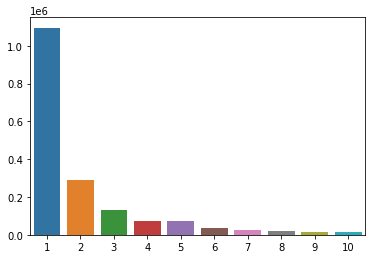

In [14]:
play_count = subset_df.play_count.value_counts()[:10]
index = play_count.index
values = play_count.values
sns.barplot(index,values)

* A big portion of the play counts is an outlier.
* Only a few users have played a song for more than 22 times.
* Atleast in this dataset.

In [15]:
play_count_max = np.max(y_train_wo)
play_count_min = np.min(y_train_wo)

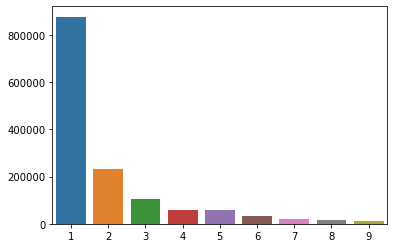

In [16]:
play_count = y_train_wo.value_counts()[:10]
index = play_count.index
values = play_count.values
sns.barplot(index,values)

### Using data for Surprise models

In [17]:
from surprise import Reader,Dataset

play_count_reader = Reader(rating_scale=(play_count_min,
                                  play_count_max))

# create the traindata from the dataframe...
train_wo = pd.concat([X_train_wo,y_train_wo],axis=1)
train_data = Dataset.load_from_df(train_wo,play_count_reader)

# build the trainset from traindata.., It is of dataset format from surprise library..
trainset = train_data.build_full_trainset() 

In [18]:
testset = list(zip(X_test_wo.user_id.values, X_test_wo.song_id.values, y_test_wo.values))

### Using the Baseline model only

In [19]:
from surprise import BaselineOnly

bsl_options = {'method': 'sgd',
               'learning_rate': .001
               }
bsl_algo = BaselineOnly(bsl_options=bsl_options)
# run this algorithm.., It will return the train and test results..

bsl_algo.fit(trainset)
train_pred = bsl_algo.test(trainset.build_testset())
train_pred

Estimating biases using sgd...


[Prediction(uid=150541, iid=51255, r_ui=2.0, est=2.0964337943640214, details={'was_impossible': False}),
 Prediction(uid=150541, iid=38515, r_ui=4.0, est=2.3577786407815937, details={'was_impossible': False}),
 Prediction(uid=150541, iid=51255, r_ui=2.0, est=2.0964337943640214, details={'was_impossible': False}),
 Prediction(uid=150541, iid=40405, r_ui=1.0, est=1.9803349251675395, details={'was_impossible': False}),
 Prediction(uid=150541, iid=36031, r_ui=1.0, est=1.543394763123903, details={'was_impossible': False}),
 Prediction(uid=150541, iid=19984, r_ui=4.0, est=1.8190720439756025, details={'was_impossible': False}),
 Prediction(uid=150541, iid=9107, r_ui=2.0, est=2.1968484483968616, details={'was_impossible': False}),
 Prediction(uid=150541, iid=50953, r_ui=4.0, est=2.007528677041783, details={'was_impossible': False}),
 Prediction(uid=150541, iid=73238, r_ui=1.0, est=1.9971574925043813, details={'was_impossible': False}),
 Prediction(uid=30660, iid=1563, r_ui=1.0, est=1.821483964

In [20]:
estimated_baseline = pd.DataFrame(train_pred,columns = ['user_id','item_id','act_play_count','estimated_play_count','details'])

In [21]:
estimated_baseline.head()

,user_id,item_id,act_play_count,estimated_play_count,details
0,150541,51255,2.0,2.096434,{'was_impossible': False}
1,150541,38515,4.0,2.357779,{'was_impossible': False}
2,150541,51255,2.0,2.096434,{'was_impossible': False}
3,150541,40405,1.0,1.980335,{'was_impossible': False}
4,150541,36031,1.0,1.543395,{'was_impossible': False}


In [22]:
def checkDetails(x):
    try:
        if x['was_impossible'] == False:
            return False
        else:
            return True
    except:
        print(x)
        
estimated_baseline['details'] = estimated_baseline['details'].apply(lambda x : checkDetails(x))        

In [23]:
estimated_baseline[estimated_baseline['details'] == False]

,user_id,item_id,act_play_count,estimated_play_count,details
0,150541,51255,2.0,2.096434,False
1,150541,38515,4.0,2.357779,False
2,150541,51255,2.0,2.096434,False
3,150541,40405,1.0,1.980335,False
4,150541,36031,1.0,1.543395,False
...,...,...,...,...,...
1415048,37848,1906,4.0,2.233450,False
1415049,201452,14002,2.0,2.311392,False
1415050,507314,52301,1.0,2.142318,False
1415051,624220,74614,5.0,2.145177,False


In [24]:
test_pred = bsl_algo.test(testset)
estimated_baseline_test = pd.DataFrame(test_pred,columns = ['user_id','item_id','act_play_count','estimated_play_count','details'])

In [25]:
estimated_baseline_test['details'] = estimated_baseline_test['details'].apply(lambda x : checkDetails(x))

In [26]:
from sklearn.metrics import mean_squared_error as mse
np.sqrt(mse(estimated_baseline_test['act_play_count'],estimated_baseline_test['estimated_play_count']))

1.6235142440162413

In [27]:
play_count_min = np.min(y_train_o)
play_count_max = np.max(y_train_o)

play_count_reader = Reader(rating_scale=(play_count_min,play_count_max))
train_o = pd.concat([X_train_o,y_train_o],axis=1)
train_data = Dataset.load_from_df(train_o,play_count_reader)
trainset = train_data.build_full_trainset() 

testset = list(zip(X_test_o.user_id.values, X_test_o.song_id.values, y_test_o.values))

In [28]:
bsl_options = {'method': 'sgd',
               'learning_rate': .001
               }
bsl_algo = BaselineOnly(bsl_options=bsl_options)
# run this algorithm.., It will return the train and test results..

bsl_algo.fit(trainset)
train_pred = bsl_algo.test(trainset.build_testset())
test_pred = bsl_algo.test(testset)

estimated_baseline_test = pd.DataFrame(test_pred,columns = ['user_id','item_id','act_play_count','estimated_play_count','details'])
estimated_baseline_test['details'] = estimated_baseline_test['details'].apply(lambda x : checkDetails(x))

np.sqrt(mse(estimated_baseline_test['act_play_count'],estimated_baseline_test['estimated_play_count']))

Estimating biases using sgd...


17.083768858486614